#### Optimization

    

##### LP (Linear Programming)

max (m1*x1 + m2*x2 + m3*x3 + m4*x4)

    subject to :
     * [1 1 1 1] . [x1 x2 x3 x4] = 10,000,000.00
     * x1 + x3 <= 6,000,000.00
     * 4*x1 + 2*x2 + 2*x3 + x1 <= 20,000,000.00
     * x1 <= 4,000,000.00
     * x4 <= 4,000,000.00
     * x4 <= 4,000,000.00
     * x4 <= 4,000,000.00

In [34]:
from scipy.optimize import linprog

  scipy.optimize.linprog :
 - solves only minimization problems
 - allow only "<=" inequality constraints

 Therefore we need to transform the formulation to:

    -min (m1*x1 + m2*x2 + m3*x3 + m4*x4)


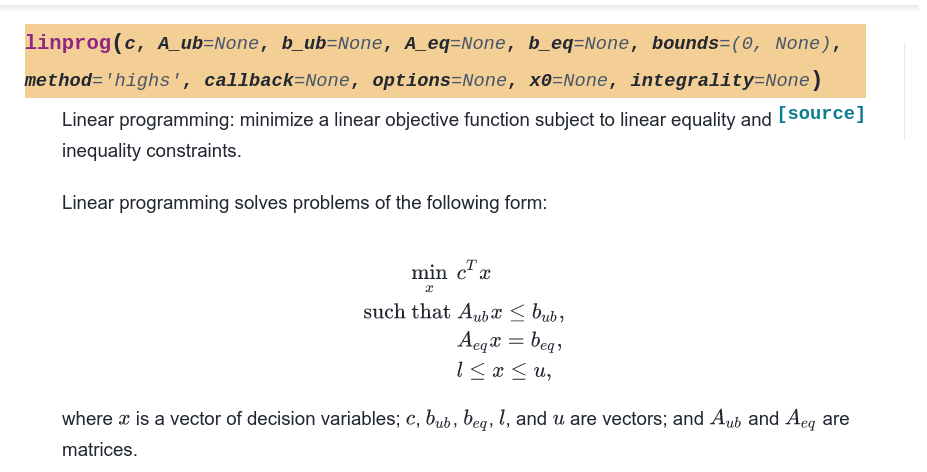

In [35]:
m1 = 0.2069
m2 = 0.0587
m3 = 0.1052
m4 = 0.0243

objective_fn_coef = [-m1, -m2, -m3, -m4]

inequality_matrix = [
     [1, 0, 1, 0],
     [4, 2, 2, 1],
     [1, 0, 0, 0],
     [0, 1, 0, 0],
     [0, 0, 1, 0],
     [0, 0, 0, 1]
]

inequality_values = [
     6000000.00,
    20000000.00,
     4000000.00,
     4000000.00,
     4000000.00,
     4000000.00
]

print(inequality_values)

equality_matrix = [[1, 1, 1, 1]]
equality_values = [10000000.00]

Bounds = [
    (0, float("inf")),  # Bounds of x1
    (0, float("inf")),  # Bounds of x2
    (0, float("inf")),  # Bounds of x3
    (0, float("inf"))   # Bounds of x4
]

res = linprog(
    c = objective_fn_coef,
    A_ub=inequality_matrix,
    b_ub=inequality_values,
    A_eq=equality_matrix,
    b_eq=equality_values,
    bounds=Bounds,
    method='highs'
)

print(res)


[6000000.0, 20000000.0, 4000000.0, 4000000.0, 4000000.0, 4000000.0]
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -931800.0
              x: [ 2.000e+06  0.000e+00  4.000e+06  4.000e+06]
            nit: 2
          lower:  residual: [ 2.000e+06  0.000e+00  4.000e+06  4.000e+06]
                 marginals: [ 0.000e+00  2.647e-02  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [ 3.657e-02]
        ineqlin:  residual: [ 0.000e+00  0.000e+00  2.000e+06  4.000e+06
                              0.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -6.087e-02 -0.000e+00 -0.000e+00
                             -2.003e-02 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


In [36]:
print("solution :  x1 =", res.x[0], " / x2 =", res.x[1], " / x3 =", res.x[2], " / x4 =", res.x[3])
print("\nmax value =", -res.fun)

solution :  x1 = 2000000.0  / x2 = 0.0  / x3 = 4000000.0  / x4 = 4000000.0

max value = 931800.0


##### LP with binary values

    max (b1*x1 + ... + b8*x8)

    subject to :
     * c1*x1 + ... c8*x8 <= C
     * x1, ... , x8 : binary

Tranform maximisaiton problem into a minimisation one:  

    -min (b1*x1 + ... + b8*x8)

In [37]:
C = 1000.0

In [38]:
b1 = 950.0
b2 = 780.0
b3 = 440.0
b4 = 215.0
b5 = 630.0
b6 = 490.0
b7 = 560.0
b8 = 600.0

In [39]:
c1 = 400.0
c2 = 350.0
c3 = 200.0
c4 = 100.0
c5 = 300.0
c6 = 250.0
c7 = 300.0
c8 = 350.0

In [40]:
objective_fn_coef = [-b1, -b2, -b3, -b4, -b5, -b6, -b7, -b8]

inequality_matrix = [ [c1, c2, c3, c4, c5, c6, c7, c8] ]
inequality_values = [ C ]

print(inequality_values)

Bounds = [
    (0, 1),  # Bounds of x1
    (0, 1),  # Bounds of x2
    (0, 1),  # Bounds of x3
    (0, 1),  # Bounds of x4
    (0, 1),  # Bounds of x5
    (0, 1),  # Bounds of x6
    (0, 1),  # Bounds of x7
    (0, 1),  # Bounds of x8
]

res = linprog(
    c = objective_fn_coef,
    A_ub=inequality_matrix,
    b_ub=inequality_values,
    bounds=Bounds,
    method='highs',
    integrality = [1, 1, 1, 1, 1, 1, 1, 1]
)

print(res)


[1000.0]
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -2235.0
              x: [ 1.000e+00  0.000e+00  1.000e+00  1.000e+00  1.000e+00
                   0.000e+00  0.000e+00  0.000e+00]
            nit: -1
          lower:  residual: [ 1.000e+00  0.000e+00  1.000e+00  1.000e+00
                              1.000e+00  0.000e+00  0.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [ 0.000e+00  1.000e+00  0.000e+00  0.000e+00
                              0.000e+00  1.000e+00  1.000e+00  1.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00]
        

In [41]:
print("solution : \n",
      "\tx1 =", res.x[0], " / x2 =", res.x[1], " / x3 =", res.x[2], " / x4 =", res.x[3],
      "\n\tx5 =", res.x[4], " / x6 =", res.x[5], " / x7 =", res.x[6], " / x8 =", res.x[7])
print("\nmax value =", -res.fun)

solution : 
 	x1 = 1.0  / x2 = 0.0  / x3 = 1.0  / x4 = 1.0 
	x5 = 1.0  / x6 = 0.0  / x7 = 0.0  / x8 = 0.0

max value = 2235.0
